In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [2]:
!jupyter --version

jupyter core     : 4.7.1
jupyter-notebook : 6.4.3
qtconsole        : 5.1.0
ipython          : 7.26.0
ipykernel        : 6.2.0
jupyter client   : 6.1.12
jupyter lab      : not installed
nbconvert        : 6.1.0
ipywidgets       : 7.6.3
nbformat         : 5.1.3
traitlets        : 5.0.5


In [3]:
import pkg_resources
import sys
print("Pandas: " + pkg_resources.get_distribution("pandas").version)
print("NumPy: " + pkg_resources.get_distribution("numpy").version)
print("Seaborn: " + pkg_resources.get_distribution("seaborn").version)
print("Scikit-Learn: " + pkg_resources.get_distribution("scikit-learn").version)
print("Python: " + sys.version)

Pandas: 1.3.2
NumPy: 1.20.3
Seaborn: 0.11.2
Scikit-Learn: 0.24.2
Python: 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]


In [4]:
data = pd.read_csv('medical_clean.csv')

<AxesSubplot:>

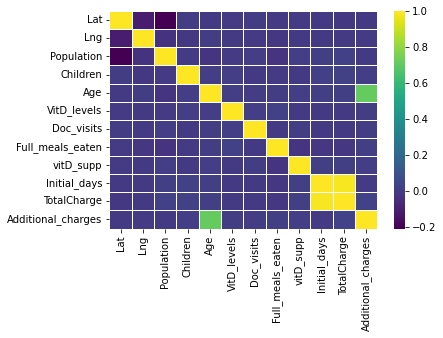

In [5]:
data_sel = data.iloc[:, np.r_[8:11, 14:16, 19:24, 39:42]]
sns.heatmap(data_sel.corr(), linewidths=1, cmap=sns.color_palette("viridis", as_cmap=True))

<AxesSubplot:>

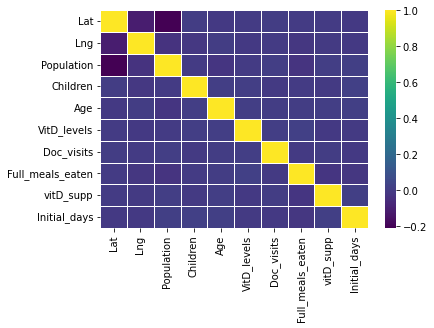

In [6]:
data_sel = data_sel.drop(['Additional_charges', 'TotalCharge'], axis=1).copy()
sns.heatmap(data_sel.corr(), linewidths=1, cmap=sns.color_palette("viridis", as_cmap=True))

In [7]:
data_tar = data_sel['ReAdmis'].copy()
data_sel = data_sel.drop(['ReAdmis'], axis=1).copy()

for i in range(len(data_sel.columns)):
    #Compute the mean and standard deviation of each column
    mean, std = np.mean(data_sel.iloc[:,i]), np.std(data_sel.iloc[:,i])
    #Set the upper and lower bounds at three standard deviations from the mean
    upper, lower = mean + 3 * std, mean - 3 * std
    #Record the index for each row that contains a value outside the previously set boundaries
    drop = [inx for inx, x in enumerate(data_sel.iloc[:, i]) if x < lower or x > upper]
    #Compare the list of indices to be dropped with those within the dataframe and drop those that still remain
    #within the data frame while ignoring those that were already dropped
    for d in drop:
        if d in data_sel.index:
            data_sel = data_sel.drop(d)
            data_tar = data_tar.drop(d)

mm = MinMaxScaler() #Instantiate the MinMaxScaler method
data_sel[data_sel.columns] = mm.fit_transform(data_sel) #Normalize the data

data_tar_list = []

for inx, val in enumerate(data_tar):
            if val == 'Yes':
                data_tar_list.append(1)
            else:
                data_tar_list.append(0)
data_tar = pd.Series(data_tar_list)
data_sel

,Lat,Lng,Population,Children,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days
0,0.328436,0.817705,0.024028,0.1,0.492958,0.562756,0.625,0.000000,0.0,0.135022
1,0.209447,0.831688,0.092033,0.3,0.464789,0.550632,0.375,0.285714,0.2,0.199037
2,0.640590,0.725053,0.139439,0.3,0.492958,0.497410,0.375,0.142857,0.0,0.053117
3,0.652617,0.754243,0.017604,0.0,0.845070,0.408150,0.375,0.142857,0.0,0.010044
4,0.438762,0.909636,0.043049,0.1,0.056338,0.460128,0.500,0.000000,0.4,0.003562
...,...,...,...,...,...,...,...,...,...,...
9995,0.399034,0.897040,0.038774,0.2,0.098592,0.432505,0.375,0.285714,0.2,0.712308
9996,0.501139,0.928484,0.010186,0.4,0.971831,0.504615,0.500,0.000000,0.0,0.953321
9997,0.396918,0.812332,0.004332,0.3,0.380282,0.441440,0.375,0.285714,0.0,0.974256
9998,0.659615,0.674784,0.002207,0.3,0.352113,0.609113,0.500,0.285714,0.2,0.878492


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_sel, data_tar, test_size=0.2, random_state=42)

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
np.unique(kmeans.labels_)

array([0, 1])

In [10]:
label_pred = kmeans.predict(X_test)
confusion_matrix(y_test, label_pred)

array([[239, 932],
       [697,   0]], dtype=int64)

In [11]:
label_pred_corrected = [(x-1)*(-1) for x in label_pred]
confusion_matrix(y_test, label_pred_corrected)

array([[932, 239],
       [  0, 697]], dtype=int64)

In [12]:
kmeans.score(X_test)

-505.8375209286834

In [13]:
data_sel.to_csv('OFM3_cleaned.csv')